In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scanpy as sc
import sys
import gc
sys.path.insert(0, 'D:/GitHub/sample_workflow/')
from IntegrationFunctions import concat_datasets, \
                                 process_datasets, \
                                 integrate_datasets

In [3]:
# Dataset id
ds_ids = ['DeZuani2024', 'Miller2023']

# List AnnData file paths
adata_paths = []
for ds_id in ds_ids:
    base = f'D:/GitHub/Data/NSCLC/{ds_id}/'
    adata_path = f'{base}{ds_id}_anndata_processed.h5ad'
    adata_paths += [adata_path]

In [4]:
# Concatenate datasets
adata = concat_datasets(adata_paths)

# Add in dataset IDs if not already present
adata.obs['ds_id'] = [i.split('_')[0] for i in adata.obs.index]

In [5]:
# Process the concatenated datasets
adata = process_datasets(adata)

c:\Users\Owner\anaconda3\envs\curate2\lib\site-packages\scanpy\preprocessing\_highly_variable_genes.py:475: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
c:\Users\Owner\anaconda3\envs\curate2\lib\site-packages\scanpy\preprocessing\_highly_variable_genes.py:475: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
c:\Users\Owner\anaconda3\envs\curate2\lib\site-packages\scanpy\preprocessing\_highly_variable_genes.py:475: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
c:\Users\Owner\anaconda3\envs\curate2\lib\site-packages\scanpy\preprocessing\_highly_variable_genes.py:475: FutureWarning: T

In [6]:
# Integrate the datasets with each sample as a batch
adata, scanvi_model = integrate_datasets(adata)

Seed set to 0


INFO     Training for 100 epochs.                                                                                  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
c:\Users\Owner\anaconda3\envs\curate2\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
c:\Users\Owner\anaconda3\envs\curate2\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Epoch 24/100:  24%|██▍       | 24/100 [04:27<14:06, 11.13s/it, v_num=1, train_loss_step=1.12e+3, train_loss_epoch=1.08e+3]
Monitored metric reconstruction_loss_validation did not improve in the last 4 records. Best score: 1086.992. Signaling Trainer to stop.


In [7]:
# Normalize and save results
adata.layers["normalized"] = scanvi_model.get_normalized_expression(adata, library_size=10000, transform_batch=None)
gc.collect()
adata.write('integration_' + '_'.join(ds_ids) + ".h5ad")
scanvi_model.save('integration_' + '_'.join(ds_ids), overwrite=True)

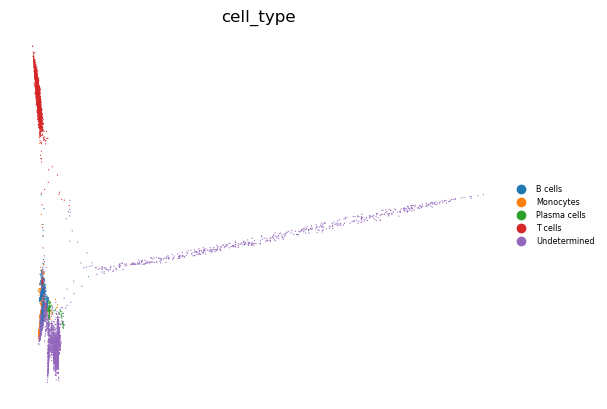

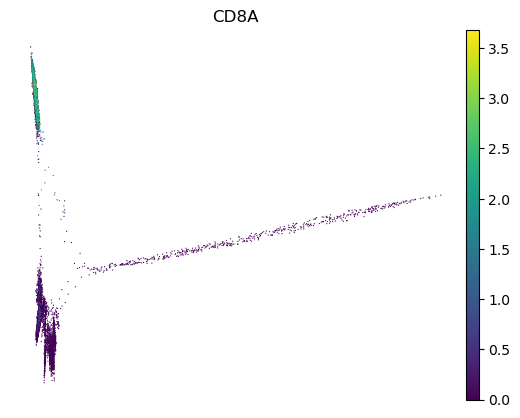

In [53]:
# Visualize the results
sc.pl.umap(adata, color="cell_type", frameon=False, size=3, legend_fontsize='xx-small', legend_fontweight='light', legend_fontoutline=2)
sc.pl.umap(adata, color="CD8A", frameon=False, size=3, legend_fontsize='xx-small', legend_fontweight='light', legend_fontoutline=2)

In [9]:
adata

AnnData object with n_obs × n_vars = 12015 × 4000
    obs: 'barcode', 'sample', 'n_genes', 'nFeature_RNA', 'nCount_RNA', 'total_counts_mt', 'percent.mt', 'DoubletScores', 'leiden', 'leiden_res_0.02', 'leiden_res_0.50', 'leiden_res_2.00', 'cell_type', 'ds_id', 'ds_sample', '_scvi_batch', '_scvi_labels'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', '_scvi_uuid', '_scvi_manager_uuid', 'neighbors', 'leiden', 'umap', 'cell_type_colors'
    obsm: 'X_pca', 'X_umap', 'X_scANVI'
    layers: 'counts', 'log2norm', 'normalized'
    obsp: 'distances', 'connectivities'